In [3]:
import pandas as pd
import io
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# ***Data Download***

In [1]:
from google.colab import files
uploaded = files.upload()


Saving HomeC.csv to HomeC.csv


In [44]:
df = pd.read_csv(io.BytesIO(uploaded['HomeC.csv']))
df.head(2)

,time,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,dewPoint
0,1451624400,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,24.4
1,1451624401,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,0.000417,0.00015,0.0,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,24.4


# ***Step 1: Data Preprocessing***

In [45]:
# 1.1 Convert the timestamp to datatime. 
df['time'] = pd.to_datetime(df['time'], unit='s')
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df = df.set_index('time')
df.head(2)

,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,dewPoint
time,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,24.4
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,0.000417,0.00015,0.0,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,24.4


In [46]:
# 1.2 Calculate the total submeter energy consumption of furnace and kitchen.
df['Furnace [kW]'] = df[['Furnace 1 [kW]', 'Furnace 2 [kW]']].sum(axis=1)
df['Kitchen [kW]'] = df[['Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum(axis=1)

df.drop(['Furnace 1 [kW]','Furnace 2 [kW]','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]'], axis=1, inplace=True)

# Move the Furnace and Kitchen column.
cols = df.columns.tolist()
cols.insert(3, cols.pop(cols.index('Furnace [kW]')))
cols.insert(8, cols.pop(cols.index('Kitchen [kW]')))
cols

df = df.reindex(columns= cols)
df.head(2)

,gen [kW],House overall [kW],Dishwasher [kW],Furnace [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,dewPoint
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.082617,0.442633,0.12415,0.006983,0.013083,0.000567,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,24.4
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.084533,0.444067,0.12400,0.006983,0.013117,0.000567,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,24.4


In [49]:
#  1.3 Check missing data.
df.info()
df.isnull().sum()

# There is no missing data. 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gen [kW]             503910 non-null  float64
 1   House overall [kW]   503910 non-null  float64
 2   Dishwasher [kW]      503910 non-null  float64
 3   Furnace [kW]         503910 non-null  float64
 4   Home office [kW]     503910 non-null  float64
 5   Fridge [kW]          503910 non-null  float64
 6   Wine cellar [kW]     503910 non-null  float64
 7   Garage door [kW]     503910 non-null  float64
 8   Kitchen [kW]         503910 non-null  float64
 9   Barn [kW]            503910 non-null  float64
 10  Well [kW]            503910 non-null  float64
 11  Microwave [kW]       503910 non-null  float64
 12  Living room [kW]     503910 non-null  float64
 13  Solar [kW]           503910 non-null  float64
 14  temperature          503910 non-nu

gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace [kW]           0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen [kW]           0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
humidity               0
visibility             0
apparentTemperature    0
pressure               0
windSpeed              0
dewPoint               0
dtype: int64

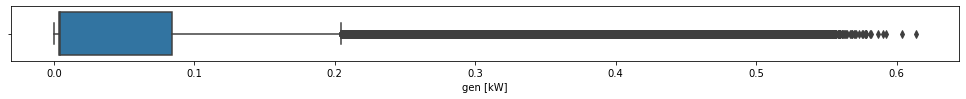

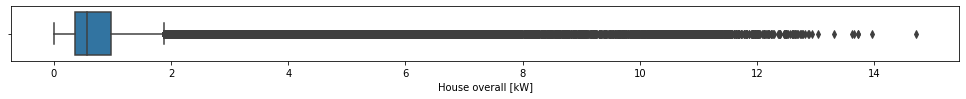

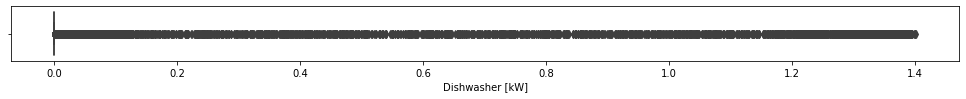

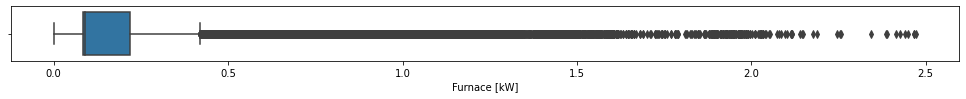

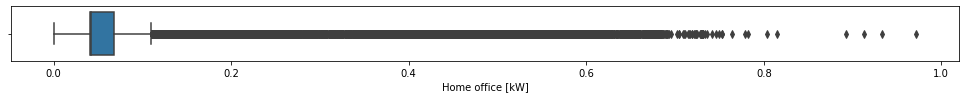

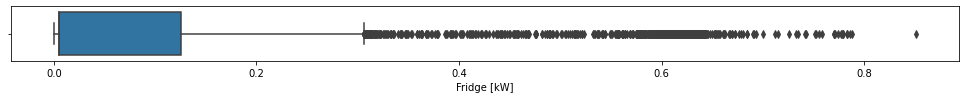

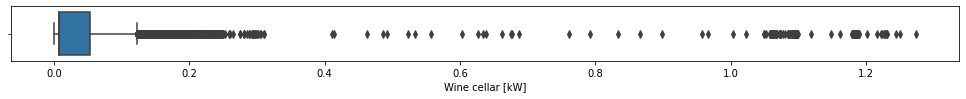

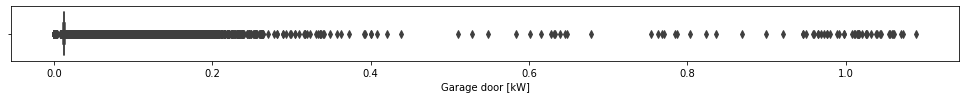

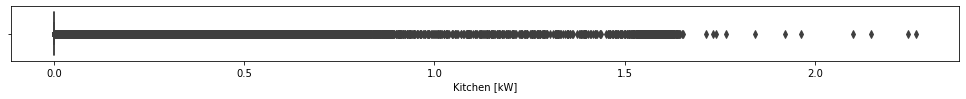

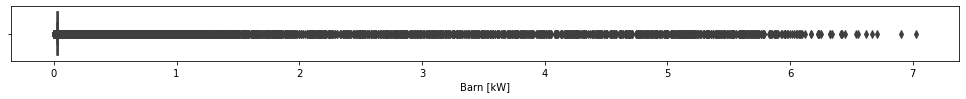

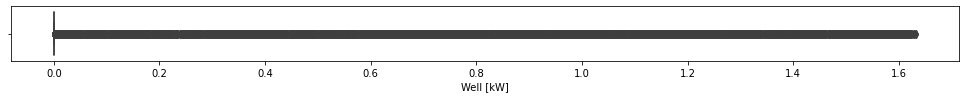

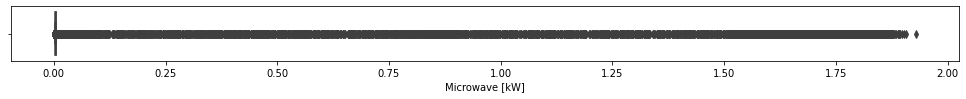

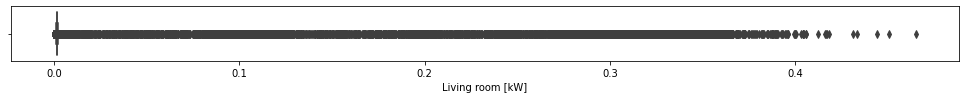

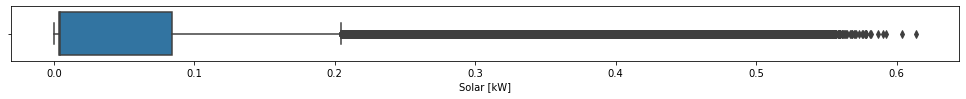

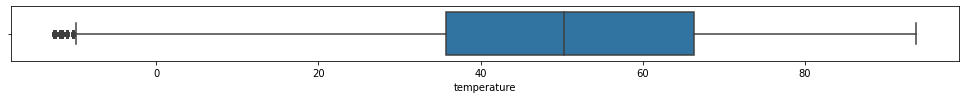

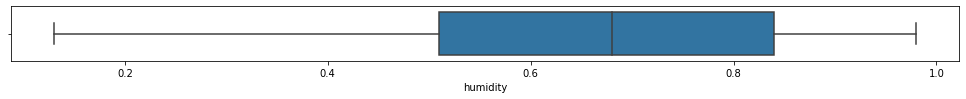

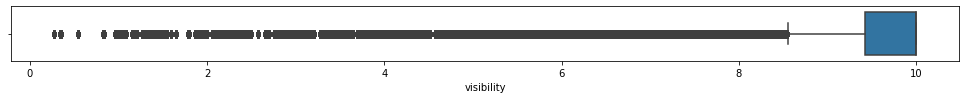

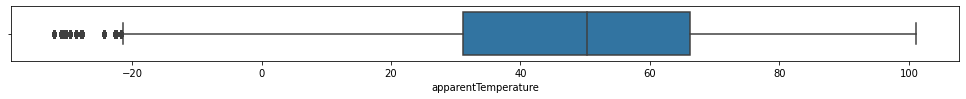

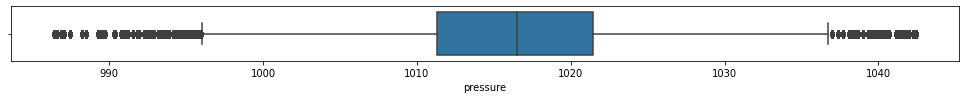

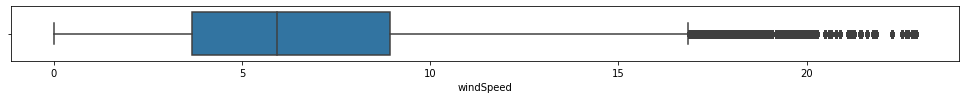

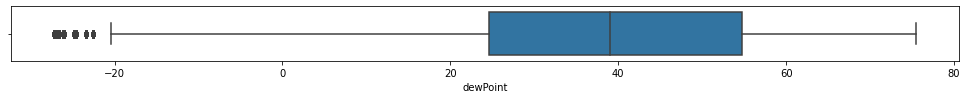

In [50]:
# 1.4 Check the outliers for each feature. 
for column in df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

# All values are within acceptable ranges.

# ***Step 2: Exploratory Data Analysis***

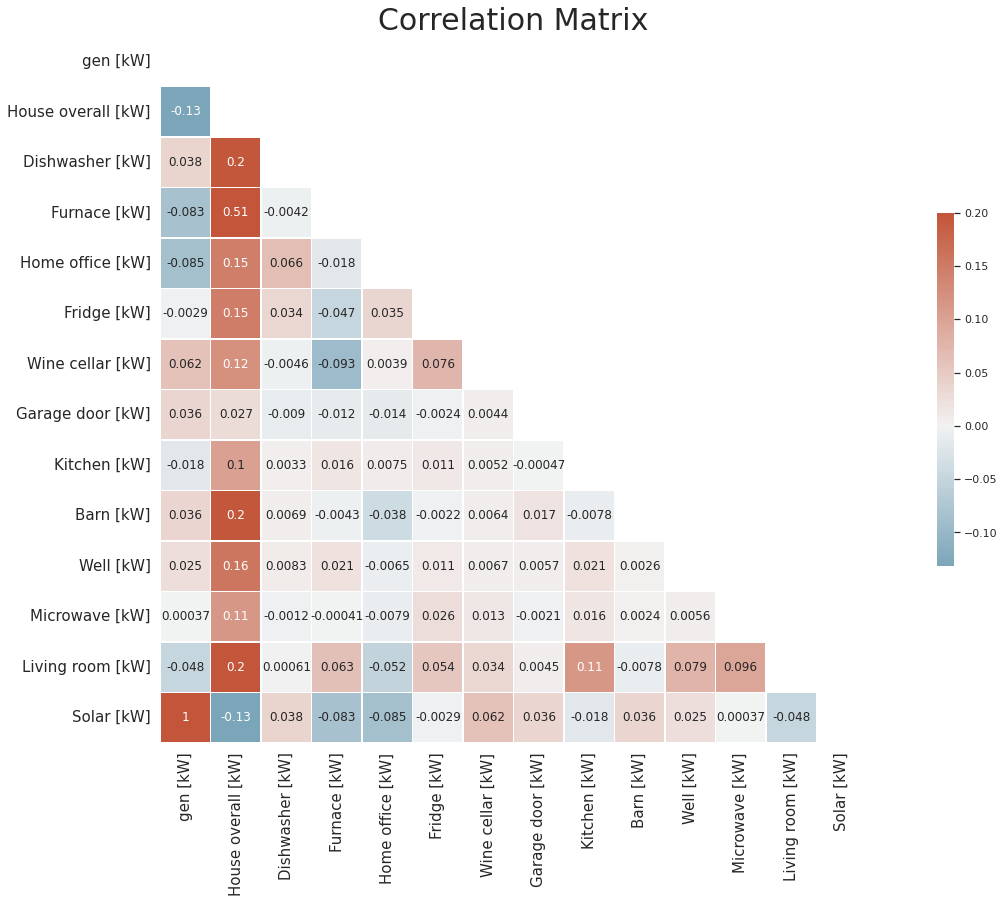

In [69]:
# 2.1 Exploratory data analysis of energy correlation. 
df_eda_1 = df.copy()
df_eda_1 = df_eda_1[df_eda_1.columns[0:14]]

sns.set_theme(style="white")

corr = df_eda_1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True )

g.axes.set_title("Correlation Matrix",fontsize=30)
g.tick_params(labelsize= 15)

g.figure.savefig(r'D:\Edmonton_project\Alberta_project\Courses\Fall_2022\MATH 509 Data Structures and Platforms\Final_project\Figure\Correlation_matrix.pdf',bbox_inches = 'tight',dpi=1200)

# Based on the corrlation matrix, we can delete some redundant and useless features. Gen and solar have a really strong correlation (1) that they are the same data.
# So the solar feature can be deleted. 

df.drop(['Solar [kW]'], axis=1, inplace= True)


# ***Step 3: Grouping***

In [71]:
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df.head()

,gen [kW],House overall [kW],Dishwasher [kW],Furnace [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,dewPoint,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.001017,0.004067,0.001517,36.14,0.62,10.0,29.26,1016.91,9.18,24.4,1,1,Friday,5,0
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.001017,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,24.4,1,1,Friday,5,1
2016-01-01 05:02:00,0.003467,0.931817,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.001000,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,24.4,1,1,Friday,5,2
2016-01-01 05:03:00,0.003483,1.022050,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.001017,0.004067,0.001617,36.14,0.62,10.0,29.26,1016.91,9.18,24.4,1,1,Friday,5,3
2016-01-01 05:04:00,0.003467,1.139400,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.001017,0.004067,0.001583,36.14,0.62,10.0,29.26,1016.91,9.18,24.4,1,1,Friday,5,4


# ***Step 4: Data Visualization***

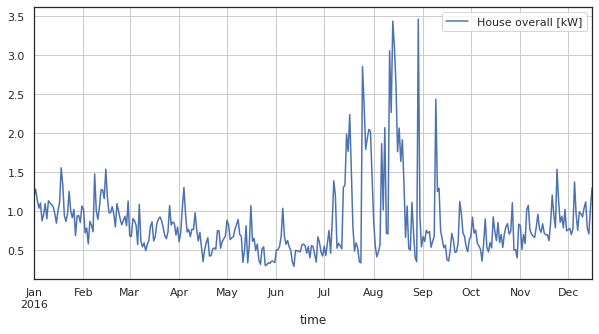

In [81]:
fig, axes = plt.subplots(figsize=(10,5))
df['House overall [kW]'].resample('D').mean().plot( grid=True, legend=True)

# We can add more figures. 

# ***Step 5: Building Machine Learning Models For the Future Energy Prediction*** 

In [ ]:
# 5.1: Build the LSTM model (Bowen). 

In [ ]:
# 5.2: Build the GRU model. (Alex, you can pick any ML models whichever you want)

# ***Step 6: Building Machine Learning Models For the Real-Time Energy Prediction*** 